### Compare the driver list of our analysis, CGC and Zhongqi Ge et al (Cell Reports 2018)

### Read data 

In [1]:
import pandas as pd
import numpy as np
import os
import re
import glob
import json
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerPathCollection

### paths

In [2]:
def read_file(filein):
    f = open(filein,'r')
    s = set()
    for line in f.readlines():
        line = line.strip()
        s.add(line)
    f.close()
    return s

In [3]:
base="../../" 
# output drivers TCGA and CCLE
df_drivers_tcga = pd.read_csv( os.path.join(base,"data","signals_E3_ligases_tcga.tsv"),sep="\t")
drivers_tcga = set(df_drivers_tcga[(df_drivers_tcga["oncodrivefml_qvalue"]<0.1)|(df_drivers_tcga["dndscv_qvalue"]<0.1)]["Hugo_Symbol"].unique())
df_drivers_ccle= pd.read_csv(os.path.join(base,"data","signals_E3_ligases_ccle.tsv"),sep="\t")
drivers_ccle= set(df_drivers_ccle[(df_drivers_ccle["oncodrivefml_qvalue"]<0.1)|(df_drivers_ccle["dndscv_qvalue"]<0.1)]["Hugo_Symbol"].unique())
driver_analysis = drivers_tcga.union(drivers_ccle)
driver_analysis=drivers_tcga
# Our list of UBS
ubs = read_file(os.path.join(base,"internal","curated_ub_du.lst"))
# Path CGC
df_cgc = pd.read_csv(os.path.join(base,"external","CancerGeneCensus.tsv"),sep="\t")
cgc=set(df_cgc[df_cgc["Gene Symbol"].isin(ubs)]["Gene Symbol"].unique())
cgc.remove("BAP1") # Here only focuses on UBS
# Path Zhongqi G et al. (Selecting only UBS from the Supplementary Figure 2, removed DUBS -USP9X, BAP1, USP28 and STAMBPL1- and CDH1)
drivers_zhongqi=read_file(os.path.join(base,"internal","hang_liang_UBS_mut.txt"))
# Plots 
path_output_plots = os.path.join(base,"plots","Figure6")


### Save our drivers with info of the other datasets (CGC and  Zhongqi)

In [8]:
output_df = df_drivers_tcga[(df_drivers_tcga["oncodrivefml_qvalue"]<0.1)|(df_drivers_tcga["dndscv_qvalue"]<0.1)]
output_df["CGC"] = output_df.apply(lambda row: row["Hugo_Symbol"] in cgc,axis=1)
output_df["Zhongqi et al."] = output_df.apply(lambda row: row["Hugo_Symbol"] in drivers_zhongqi,axis=1)
output_df.sort_values(["oncodrivefml_qvalue","dndscv_qvalue"]).to_csv(os.path.join(base,"data","comparison_signals_E3_ligases.tsv"),sep="\t",index=False)

/home/fran/Downloads/yes/envs/regression/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/fran/Downloads/yes/envs/regression/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


### Venn diagram with Labels

In [4]:
class VennDiagram:
    """Class for drawing venn-diagrams"""
    def __init__(self, set1, set2, set3, names):
        self.method_1 = set1
        self.method_2 = set2
        self.method_3 = set3
        self.names = names
        

    @staticmethod
    def _annotate_left(genes, v, ax):
        """Annotate genes on the left side of the plot"""
        if len(genes) > 50:
            logging.warning('WARNING: too many genes to annotate on the left. Max is 50.')
        else:
            ax.annotate("\n".join(genes), 
                        xy=v.get_label_by_id('100').get_position() - np.array([0, 0.05]), 
                        xytext=(-100, -100),
                        ha='center', 
                        textcoords='offset points', 
                        bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
                        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='gray'))

    @staticmethod    
    def _annotate_commontotal(genes, v, ax):
        """Annotate genes on the center of the plot"""
        # Create tables of 5 genes
        common = ''
        for i, gene in enumerate(genes):
            if i == 0:
                common += gene
            elif i % 5 == 0:
                common += "\n" + gene
            else:
                common += '     ' + gene
        #rows = ''
        #for genes in common:
        #    rows +="{: >20} {: >20} {: >20}  {: >20}  {: >20}\n".format(*genes)
        ax.annotate(common, 
                    xy=v.get_label_by_id('111').get_position() + np.array([0, 0.05]), 
                    xytext=(150, 0),
                    ha='center', 
                    textcoords='offset points', 
                    bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='gray'))
    @staticmethod    
    def _annotate_common2(genes, v, ax):
        """Annotate genes on the center of the plot"""
        # Create tables of 5 genes
        common = ''
        for i, gene in enumerate(genes):
            if i == 0:
                common += gene
            elif i % 5 == 0:
                common += "\n" + gene
            else:
                common += '     ' + gene
        #rows = ''
        #for genes in common:
        #    rows +="{: >20} {: >20} {: >20}  {: >20}  {: >20}\n".format(*genes)
        ax.annotate(common, 
                    xy=v.get_label_by_id('110').get_position() + np.array([0, 0.05]), 
                    xytext=(0, 100),
                    ha='center', 
                    textcoords='offset points', 
                    bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='gray'))
    @staticmethod    
    def _annotate_common3(genes, v, ax):
        """Annotate genes on the center of the plot"""
        # Create tables of 5 genes
        common = ''
        for i, gene in enumerate(genes):
            if i == 0:
                common += gene
            elif i % 5 == 0:
                common += "\n" + gene
            else:
                common += '     ' + gene
        #rows = ''
        #for genes in common:
        #    rows +="{: >20} {: >20} {: >20}  {: >20}  {: >20}\n".format(*genes)
        ax.annotate(common, 
                    xy=v.get_label_by_id('101').get_position() + np.array([0, 0.05]), 
                    xytext=(-100, -100),
                    ha='center', 
                    textcoords='offset points', 
                    bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='gray'))
        
    def plot(self,output_file):
        """Create a venn diagram of the overlap between two methods"""
        fig = plt.figure(figsize=(6, 6))
        ax = plt.subplot2grid((1, 1), (0, 0))
        set_1 = self.method_1
        set_2 = self.method_2
        set_3 = self.method_3
        # Create sets
        only_1 = set_1 - set_2 - set_3
        common_total = set_1 & set_2 & set_3
        common_set2 = set_1 & set_2  - set_3
        common_set3 = set_1 & set_3 - set_2



        #v = do_venn3(sets=(set_1, set_2,set_3 ), labels=self.names)
        v = venn3([set_1, set_2,set_3 ], set_labels=self.names)

        # Annotate
        self._annotate_left(genes=only_1, v=v, ax=ax)
        self._annotate_common2(genes=common_set2, v=v, ax=ax)
        self._annotate_common3(genes=common_set3, v=v, ax=ax)
        self._annotate_commontotal(genes=common_total, v=v, ax=ax)

        # Show plot
        #plt.tight_layout(w_pad=15)
        plt.savefig(output_file,dpi=600,bbox_inches="tight")
        plt.show()

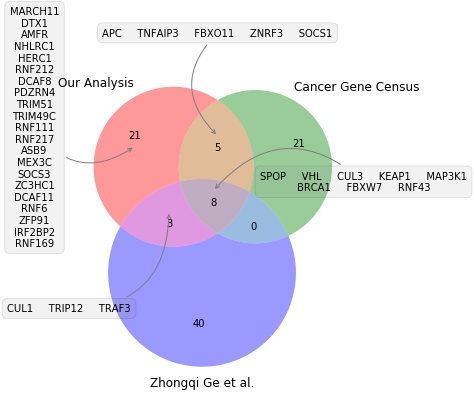

In [6]:
v = VennDiagram(driver_analysis, cgc,drivers_zhongqi,names=('Our Analysis', 'Cancer Gene Census', 'Zhongqi Ge et al.'))
v.plot(os.path.join(path_output_plots,"venn_comparison.pdf"))